In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# 0. Install and Import Dependencies

In [2]:
 pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from fbprophet import Prophet
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import urllib.parse
import datetime as dt
from urllib.parse import quote_plus as urlquote
from functools import reduce
from matplotlib import pyplot as plt

# 1. Read in Data and Process Dates

In [5]:
connection_string = "postgres:Cellxan69$$@localhost:5432/covid_db"
engine = create_engine(f'postgresql://{connection_string}')


In [6]:
df = pd.read_sql_query('SELECT * FROM covid', engine)


In [7]:
df

,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-03-01,AR,322509,94,5250,NaN,7,661572.0,424534.0,7.73,21.92,233135.0,14.07,29.58,18023.0,5972.0,0.741
1,2021-01-16,OH,821507,7065,10135,9080.0,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21926.0,1876.0,NaN
2,2021-02-14,AR,313028,466,5265,NaN,13,472536.0,338611.0,4.33,15.66,130637.0,11.22,20.90,11299.0,3744.0,0.749
3,2021-02-26,KS,293663,826,4735,NaN,11,560776.0,383658.0,5.93,19.25,172744.0,13.17,29.58,13437.0,4612.0,0.651
4,2021-01-19,SD,105786,127,1667,1346.0,0,61113.0,51288.0,1.11,6.91,9777.0,5.80,10.59,1774.0,2005.0,0.652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,2021-01-23,NM,168579,848,3115,NaN,38,184698.0,148964.0,1.58,8.81,33133.0,7.10,12.26,10812.0,5156.0,0.718
3128,2021-03-04,SD,113065,232,1896,1538.0,3,294765.0,193817.0,11.38,33.32,100712.0,21.91,42.59,6364.0,7194.0,0.782
3129,2021-02-21,KS,290832,0,4614,NaN,0,509332.0,356901.0,5.09,17.48,148378.0,12.25,22.17,17050.0,5852.0,0.789
3130,2021-01-24,UT,336405,1516,1595,1550.0,13,202729.0,175364.0,0.65,6.32,20697.0,5.47,10.66,8146.0,2541.0,0.593


In [8]:
df.describe()

,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
count,3.132000e+03,3132.000000,3132.000000,1740.000000,3132.000000,2.916000e+03,2.910000e+03,2847.000000,2916.000000,2.847000e+03,2910.000000,2916.000000,3132.000000,3132.000000,2916.000000
mean,4.830559e+05,1939.060026,8103.592273,7050.830460,46.281290,9.040490e+05,6.419448e+05,4.668844,15.757401,2.606750e+05,11.064216,22.370473,27148.106322,4673.322797,0.671738
std,5.871127e+05,3658.153829,9423.317773,5565.374741,101.266914,1.256002e+06,8.625377e+05,3.520105,8.793683,3.995860e+05,5.312924,10.519112,33598.512311,1914.120629,0.154360
min,3.000000e+00,-504.000000,0.000000,456.000000,-174.000000,1.195000e+03,4.010000e+02,0.000000,1.140000,9.000000e+00,0.240000,6.170000,0.000000,0.000000,0.111000
25%,1.081105e+05,239.500000,1767.750000,1744.500000,2.000000,1.965232e+05,1.513000e+05,1.580000,8.380000,4.180100e+04,6.815000,14.157500,6987.000000,3301.750000,0.568000
50%,3.363670e+05,841.000000,5185.000000,5979.500000,15.000000,4.840805e+05,3.613720e+05,3.790000,14.460000,1.148070e+05,10.550000,19.980000,16563.000000,4396.000000,0.702000
75%,6.174502e+05,2263.000000,10464.500000,9910.750000,49.000000,1.117789e+06,8.007948e+05,7.330000,22.370000,3.067895e+05,15.020000,29.627500,35479.000000,5847.000000,0.786000
max,3.516862e+06,81806.000000,54891.000000,21340.000000,2559.000000,1.122051e+07,7.600220e+06,16.700000,42.840000,3.541495e+06,27.090000,77.590000,265023.000000,17886.000000,1.077000


In [9]:
df.dtypes

date                                   datetime64[ns]
state                                          object
tot_cases                                       int64
new_case                                        int64
tot_death                                       int64
conf_death                                    float64
new_death                                       int64
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated_per_hundred           float64
total_vaccinations_per_hundred                float64
people_fully_vaccinated                       float64
people_vaccinated_per_hundred                 float64
distributed_per_hundred                       float64
daily_vaccinations                            float64
daily_vaccinations_per_million                float64
share_doses_used                              float64
dtype: object

In [10]:
df.sort_values(by=['state'],inplace=False, ascending=True)
#total_cases = df["state"].sum()


,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
307,2021-01-16,AK,50017,182,228,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4381.0,5989.0,NaN
2947,2021-02-09,AK,53809,115,278,NaN,1,152874.0,110936.0,5.70,20.90,41698.0,15.16,35.12,4204.0,5747.0,0.595
2942,2021-02-12,AK,54282,148,280,NaN,2,167436.0,118189.0,6.69,22.89,48969.0,16.16,37.09,4776.0,6529.0,0.617
2941,2021-03-07,AK,56886,0,301,NaN,0,295046.0,180563.0,15.56,40.33,113792.0,24.68,58.33,4329.0,5918.0,0.691
101,2021-03-02,AK,56428,89,299,NaN,2,269941.0,168315.0,13.81,36.90,101000.0,23.01,50.95,4288.0,5862.0,0.724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,2021-02-18,WY,53531,81,662,662.0,0,105426.0,74983.0,5.20,18.22,30110.0,12.96,21.96,3702.0,6396.0,0.830
1618,2021-02-14,WY,53136,50,647,647.0,0,99099.0,71653.0,4.69,17.12,27132.0,12.38,21.11,3892.0,6725.0,0.811
1282,2021-03-08,WY,54903,139,682,682.0,0,185580.0,114824.0,11.79,32.07,68219.0,19.84,40.79,4120.0,7119.0,0.786
795,2021-01-14,WY,48701,412,522,522.0,0,19776.0,17310.0,NaN,3.42,NaN,2.99,10.16,1654.0,2858.0,0.336


In [11]:
per_hundred= df[df['date']=='2021-03-03']
per_hundred

,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
85,2021-03-03,FL,1888725,5860,31267,NaN,132,5167346.0,3297947.0,8.54,24.06,1833883.0,15.36,33.11,94949.0,4421.0,0.727
151,2021-03-03,OH,972605,2022,17189,17189.0,0,2790056.0,1801523.0,8.37,23.87,978945.0,15.41,31.54,71704.0,6134.0,0.757
192,2021-03-03,NM,185898,356,3753,NaN,13,735930.0,472126.0,12.19,35.10,255621.0,22.52,39.19,16752.0,7989.0,0.895
254,2021-03-03,PR,100867,102,2053,1745.0,5,568025.0,363587.0,6.35,17.79,202776.0,11.38,35.57,10416.0,3261.0,0.500
262,2021-03-03,AR,323353,404,5261,NaN,7,687433.0,441126.0,8.03,22.78,242346.0,14.62,31.97,18995.0,6294.0,0.712
294,2021-03-03,WV,132416,232,2309,NaN,8,541453.0,327437.0,11.94,30.21,213929.0,18.27,36.41,9568.0,5339.0,0.830
297,2021-03-03,TN,777935,1598,11459,9215.0,23,1455498.0,953568.0,7.25,21.31,495032.0,13.96,29.92,39929.0,5847.0,0.712
354,2021-03-03,PA,938411,2577,24169,NaN,69,2948581.0,2027556.0,7.12,23.03,911602.0,15.84,33.43,74736.0,5838.0,0.689
355,2021-03-03,TX,2663414,7822,43563,NaN,297,6191550.0,4001348.0,7.53,21.35,2182085.0,13.80,30.04,181084.0,6245.0,0.711
501,2021-03-03,HI,26797,17,438,NaN,2,399195.0,251867.0,10.39,28.19,147043.0,17.79,39.34,8489.0,5996.0,0.717


In [12]:
total_cases = per_hundred["tot_cases"]
print('Total Number of cases by state')
tot_cases = per_hundred.groupby('state')['tot_cases'].sum().sort_values(ascending=False).to_frame()
tot_cases.style.background_gradient(cmap='Blues_r')

Total Number of cases by state


,tot_cases
state,
CA,3484963
TX,2663414
FL,1888725
IL,1191520
GA,1014542
OH,972605
PA,938411
NY,927750
NC,865554


In [13]:
total_death = per_hundred["tot_death"]
print('Total Number of deaths by state')
tot_death = per_hundred.groupby('state')['tot_death'].sum().sort_values(ascending=False).to_frame()
tot_death.style.background_gradient(cmap='Blues_r')

Total Number of deaths by state


,tot_death
state,
CA,52775
TX,43563
FL,31267
PA,24169
NJ,23449
IL,22853
NY,18092
GA,17625
OH,17189


In [14]:
per_hundred= df[df['date']=='2021-03-03']
per_hundred

,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
85,2021-03-03,FL,1888725,5860,31267,NaN,132,5167346.0,3297947.0,8.54,24.06,1833883.0,15.36,33.11,94949.0,4421.0,0.727
151,2021-03-03,OH,972605,2022,17189,17189.0,0,2790056.0,1801523.0,8.37,23.87,978945.0,15.41,31.54,71704.0,6134.0,0.757
192,2021-03-03,NM,185898,356,3753,NaN,13,735930.0,472126.0,12.19,35.10,255621.0,22.52,39.19,16752.0,7989.0,0.895
254,2021-03-03,PR,100867,102,2053,1745.0,5,568025.0,363587.0,6.35,17.79,202776.0,11.38,35.57,10416.0,3261.0,0.500
262,2021-03-03,AR,323353,404,5261,NaN,7,687433.0,441126.0,8.03,22.78,242346.0,14.62,31.97,18995.0,6294.0,0.712
294,2021-03-03,WV,132416,232,2309,NaN,8,541453.0,327437.0,11.94,30.21,213929.0,18.27,36.41,9568.0,5339.0,0.830
297,2021-03-03,TN,777935,1598,11459,9215.0,23,1455498.0,953568.0,7.25,21.31,495032.0,13.96,29.92,39929.0,5847.0,0.712
354,2021-03-03,PA,938411,2577,24169,NaN,69,2948581.0,2027556.0,7.12,23.03,911602.0,15.84,33.43,74736.0,5838.0,0.689
355,2021-03-03,TX,2663414,7822,43563,NaN,297,6191550.0,4001348.0,7.53,21.35,2182085.0,13.80,30.04,181084.0,6245.0,0.711
501,2021-03-03,HI,26797,17,438,NaN,2,399195.0,251867.0,10.39,28.19,147043.0,17.79,39.34,8489.0,5996.0,0.717


In [15]:
total_vac = per_hundred["people_vaccinated_per_hundred"]
print('Total Number of people vaccinated per 100 by state')
tot_vac = per_hundred.groupby('state')['people_vaccinated_per_hundred'].mean().sort_values(ascending=False).to_frame()
tot_vac.style.background_gradient(cmap='Blues_r')

Total Number of people vaccinated per 100 by state


,people_vaccinated_per_hundred
state,
AK,23.270000
AS,23.250000
NM,22.520000
SD,21.460000
GU,20.850000
CT,20.760000
ND,20.380000
MA,19.110000
RI,18.940000


In [16]:
penn = df[df['state']=='PA']
penn

,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
51,2021-03-09,PA,953136,2975,24396,NaN,40,3524263.0,2401448.0,8.73,27.53,1117905.0,18.76,37.56,91116.0,7117.0,0.733
58,2021-02-13,PA,892344,4088,23072,NaN,113,1678229.0,1269266.0,3.15,13.11,403898.0,9.91,20.95,48534.0,3791.0,0.626
63,2021-02-09,PA,876913,4088,22620,NaN,149,1478180.0,1134099.0,2.66,11.55,340234.0,8.86,18.14,46034.0,3596.0,0.636
97,2021-02-25,PA,922990,2356,23868,NaN,81,2489919.0,1765921.0,5.59,19.45,716193.0,13.79,28.49,69590.0,5436.0,0.683
119,2021-02-10,PA,880291,3378,22745,NaN,125,1538058.0,1176825.0,2.79,12.01,356869.0,9.19,19.04,54281.0,4240.0,0.631
121,2021-01-25,PA,807867,3934,20664,NaN,55,776799.0,639526.0,1.06,6.07,135939.0,5.00,12.22,36636.0,2862.0,0.497
153,2021-02-22,PA,915018,1521,23614,NaN,17,2358058.0,1699219.0,5.09,18.42,651588.0,13.27,23.35,75797.0,5921.0,0.789
184,2021-02-18,PA,905995,3345,23413,NaN,94,2002786.0,1478146.0,4.05,15.64,518285.0,11.55,21.33,58330.0,4556.0,0.733
193,2021-02-26,PA,926336,3346,23937,NaN,69,2562627.0,1804835.0,5.86,20.02,749659.0,14.10,29.74,53951.0,4214.0,0.673
205,2021-01-24,PA,803933,3976,20609,NaN,83,744591.0,611359.0,1.03,5.82,131908.0,4.78,12.22,35472.0,2771.0,0.476


In [17]:
penn.query('people_vaccinated_per_hundred != people_vaccinated_per_hundred')

,date,state,tot_cases,new_case,tot_death,conf_death,new_death,total_vaccinations,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
499,2021-01-17,PA,767800,6023,19310,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30867.0,2411.0,NaN
556,2021-01-16,PA,761777,7166,19188,NaN,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32567.0,2544.0,NaN
2924,2021-02-15,PA,896860,1945,23119,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55160.0,4309.0,NaN
3109,2021-01-18,PA,771845,4045,19390,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29734.0,2323.0,NaN


In [18]:
#penn['people_vaccinated_per_hundred']=penn['people_vaccinated_per_hundred'].fillna(method='ffill')

In [19]:
penn1=penn.filter(['date','people_vaccinated_per_hundred'])
penn1

,date,people_vaccinated_per_hundred
51,2021-03-09,18.76
58,2021-02-13,9.91
63,2021-02-09,8.86
97,2021-02-25,13.79
119,2021-02-10,9.19
121,2021-01-25,5.00
153,2021-02-22,13.27
184,2021-02-18,11.55
193,2021-02-26,14.10
205,2021-01-24,4.78


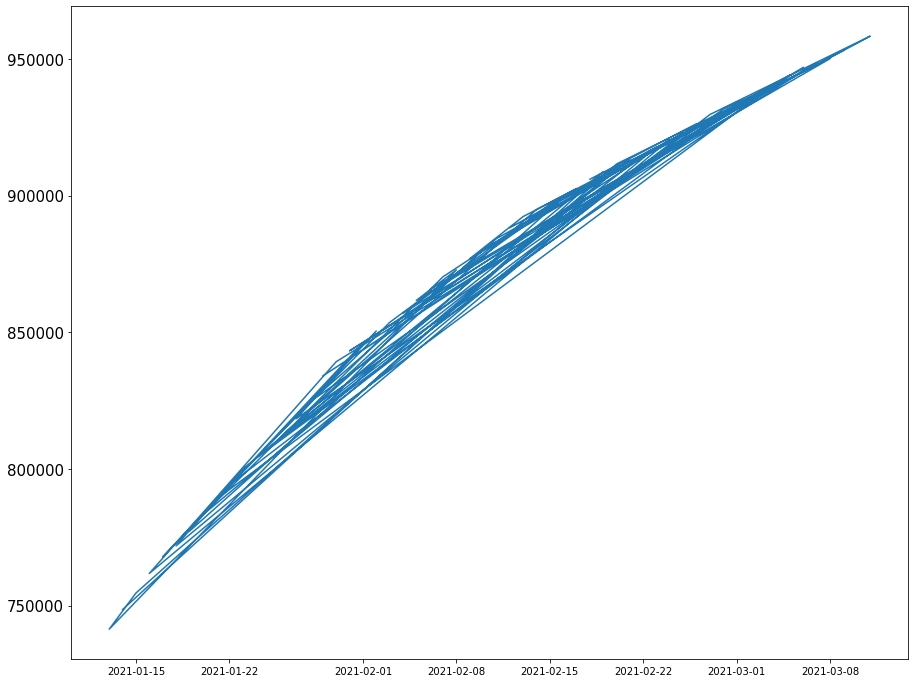

In [20]:
plt.figure(figsize=(15,12))
plt.xticks(size=10)
plt.yticks(size=15)
plt.plot(penn['date'], penn['tot_cases'])
plt.show()

In [21]:
import numpy as np

In [22]:
##penn["people_vaccinated_per_hundred"] = np.log(penn['people_vaccinated_per_hundred'])

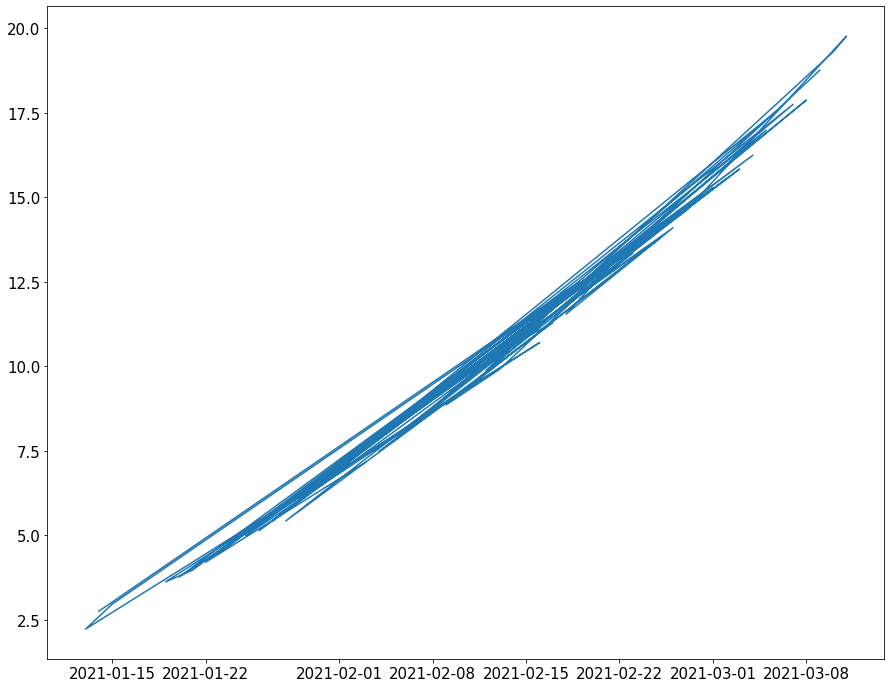

In [24]:
plt.figure(figsize=(15,12))
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(penn['date'], penn['people_vaccinated_per_hundred'])
plt.show()

In [25]:
#plt.figure(figsize=(15,12))
#plt.xticks(size=15)
#plt.yticks(size=15)
#plt.plot(penn['date'], penn['death'])
#plt.show()

In [26]:
#cali_cases = cali.colomns = ['date', 'cases']
#cali_cases

In [27]:
#penn_cases = penn.drop(["death_Increase", "hospitalized", "positive_Increase",
#"hospitalized_Increase","totalTestResults","total_vaccinations",
#"people_fully_vaccinated","daily_vaccinations_per_million","people_vaccinated", "people_fully_vaccinated_per_hundred"
#, "distributed_per_hundred","state","death", "daily_vaccinations"],axis=1)


In [28]:
#penn_cases = penn.drop(['total_vaccinations_per_hundred'],axis=1)

In [29]:
#penn_cases= penn[['date', 'positive', 'people_vaccinated_per_hundred']]
#penn_cases

In [30]:
penn1 = penn1.rename(columns = {'date' : 'ds','people_vaccinated_per_hundred': 'y'})
penn1

,ds,y
51,2021-03-09,18.76
58,2021-02-13,9.91
63,2021-02-09,8.86
97,2021-02-25,13.79
119,2021-02-10,9.19
121,2021-01-25,5.00
153,2021-02-22,13.27
184,2021-02-18,11.55
193,2021-02-26,14.10
205,2021-01-24,4.78


# 2. Train Model

In [31]:
m = Prophet()
#m.add_regressor('add1',standardize=False)
m.fit(penn1)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
m.params


{'k': array([[0.59282299]]),
 'm': array([[0.12306486]]),
 'delta': array([[-3.68429355e-10,  1.31003656e-09,  1.33761873e-06,
          1.90975082e-02,  1.42991139e-01,  6.75801134e-04,
          2.24061692e-04,  3.79160638e-04,  9.10706705e-10,
          8.59799357e-11,  1.25199906e-04,  1.92813174e-02,
          6.14231888e-04,  1.23689336e-01,  1.51523051e-04,
          7.65236310e-04,  2.15736271e-04,  7.13500118e-11,
          9.94629677e-10, -2.62696380e-04, -3.75179257e-04,
         -2.08117177e-09,  1.76980443e-09, -2.68637321e-10,
          3.29090405e-01]]),
 'sigma_obs': array([[0.00830001]]),
 'beta': array([[ 0.00412813, -0.00384935,  0.00019534,  0.00016298,  0.00074459,
         -0.00114919]]),
 'trend': array([[0.12306486, 0.13346526, 0.14386566, 0.18546728, 0.19586768,
         0.20626809, 0.21666851, 0.22706894, 0.23780441, 0.2510485 ,
         0.26429258, 0.27754853, 0.29080447, 0.30406435, 0.31733087,
         0.3305974 , 0.34386392, 0.35713045, 0.37039698, 0.38366

# 3. Forecast Away

In [51]:
future = m.make_future_dataframe(periods=400)


In [52]:
future.tail()

,ds
453,2022-04-11
454,2022-04-12
455,2022-04-13
456,2022-04-14
457,2022-04-15


In [53]:
forecast= m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-13,2.432992,2.125991,2.532088,2.432992,2.432992,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,0.0,0.0,0.0,2.331336
1,2021-01-14,2.638608,2.341699,2.760426,2.638608,2.638608,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,0.0,0.0,0.0,2.543009
2,2021-01-15,2.844224,2.681371,3.111778,2.844224,2.844224,0.046264,0.046264,0.046264,0.046264,0.046264,0.046264,0.0,0.0,0.0,2.890488
3,2021-01-16,3.049840,2.909252,3.318448,3.049840,3.049840,0.066248,0.066248,0.066248,0.066248,0.066248,0.066248,0.0,0.0,0.0,3.116088
4,2021-01-17,3.255456,3.166559,3.582498,3.255456,3.255456,0.122372,0.122372,0.122372,0.122372,0.122372,0.122372,0.0,0.0,0.0,3.377829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2022-04-11,188.419040,141.380305,236.810309,141.452220,236.842794,0.028887,0.028887,0.028887,0.028887,0.028887,0.028887,0.0,0.0,0.0,188.447927
454,2022-04-12,188.845478,141.633014,237.508831,141.694216,237.429662,-0.066517,-0.066517,-0.066517,-0.066517,-0.066517,-0.066517,0.0,0.0,0.0,188.778962
455,2022-04-13,189.271916,141.782647,237.946940,141.970397,238.016501,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,0.0,0.0,0.0,189.170260
456,2022-04-14,189.698354,141.840774,238.418087,142.172184,238.601823,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,0.0,0.0,0.0,189.602755


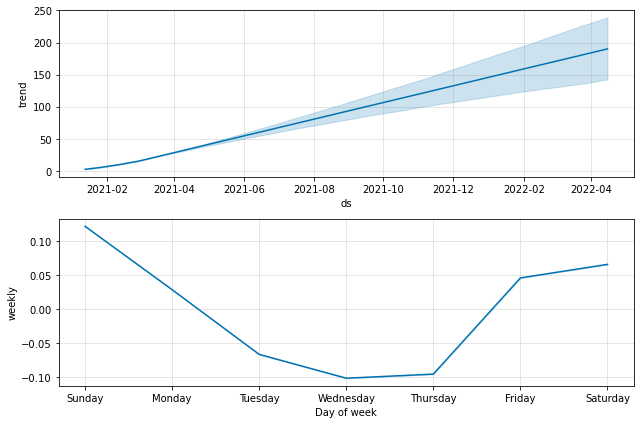

In [54]:
fig2 = m.plot_components(forecast)

In [56]:
penn2=penn.filter(['date','share_doses_used'])
penn2

,date,share_doses_used
51,2021-03-09,0.733
58,2021-02-13,0.626
63,2021-02-09,0.636
97,2021-02-25,0.683
119,2021-02-10,0.631
121,2021-01-25,0.497
153,2021-02-22,0.789
184,2021-02-18,0.733
193,2021-02-26,0.673
205,2021-01-24,0.476


In [57]:
penn2 = penn2.rename(columns = {'date' : 'ds','share_doses_used': 'y'})
penn2

,ds,y
51,2021-03-09,0.733
58,2021-02-13,0.626
63,2021-02-09,0.636
97,2021-02-25,0.683
119,2021-02-10,0.631
121,2021-01-25,0.497
153,2021-02-22,0.789
184,2021-02-18,0.733
193,2021-02-26,0.673
205,2021-01-24,0.476


In [58]:
m = Prophet()
#m.add_regressor('add1',standardize=False)
m.fit(penn1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
m.params


{'k': array([[0.59282299]]),
 'm': array([[0.12306486]]),
 'delta': array([[-3.68429355e-10,  1.31003656e-09,  1.33761873e-06,
          1.90975082e-02,  1.42991139e-01,  6.75801134e-04,
          2.24061692e-04,  3.79160638e-04,  9.10706705e-10,
          8.59799357e-11,  1.25199906e-04,  1.92813174e-02,
          6.14231888e-04,  1.23689336e-01,  1.51523051e-04,
          7.65236310e-04,  2.15736271e-04,  7.13500118e-11,
          9.94629677e-10, -2.62696380e-04, -3.75179257e-04,
         -2.08117177e-09,  1.76980443e-09, -2.68637321e-10,
          3.29090405e-01]]),
 'sigma_obs': array([[0.00830001]]),
 'beta': array([[ 0.00412813, -0.00384935,  0.00019534,  0.00016298,  0.00074459,
         -0.00114919]]),
 'trend': array([[0.12306486, 0.13346526, 0.14386566, 0.18546728, 0.19586768,
         0.20626809, 0.21666851, 0.22706894, 0.23780441, 0.2510485 ,
         0.26429258, 0.27754853, 0.29080447, 0.30406435, 0.31733087,
         0.3305974 , 0.34386392, 0.35713045, 0.37039698, 0.38366

In [66]:
future = m.make_future_dataframe(periods=200)


In [67]:
future.tail()


,ds
253,2021-09-23
254,2021-09-24
255,2021-09-25
256,2021-09-26
257,2021-09-27


In [68]:
forecast= m.predict(future)


In [69]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-13,2.432992,2.120183,2.536101,2.432992,2.432992,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,-0.101656,0.0,0.0,0.0,2.331336
1,2021-01-14,2.638608,2.339643,2.745522,2.638608,2.638608,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,0.0,0.0,0.0,2.543009
2,2021-01-15,2.844224,2.676297,3.103610,2.844224,2.844224,0.046264,0.046264,0.046264,0.046264,0.046264,0.046264,0.0,0.0,0.0,2.890488
3,2021-01-16,3.049840,2.904587,3.321376,3.049840,3.049840,0.066248,0.066248,0.066248,0.066248,0.066248,0.066248,0.0,0.0,0.0,3.116088
4,2021-01-17,3.255456,3.168478,3.593178,3.255456,3.255456,0.122372,0.122372,0.122372,0.122372,0.122372,0.122372,0.0,0.0,0.0,3.377829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2021-09-23,103.131461,86.463727,119.446002,86.421754,119.536894,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,-0.095599,0.0,0.0,0.0,103.035862
254,2021-09-24,103.557899,86.849786,120.097140,86.740687,120.070607,0.046264,0.046264,0.046264,0.046264,0.046264,0.046264,0.0,0.0,0.0,103.604162
255,2021-09-25,103.984336,87.238099,120.571470,86.995217,120.600029,0.066248,0.066248,0.066248,0.066248,0.066248,0.066248,0.0,0.0,0.0,104.050585
256,2021-09-26,104.410774,87.504315,121.187734,87.261293,121.116435,0.122372,0.122372,0.122372,0.122372,0.122372,0.122372,0.0,0.0,0.0,104.533147


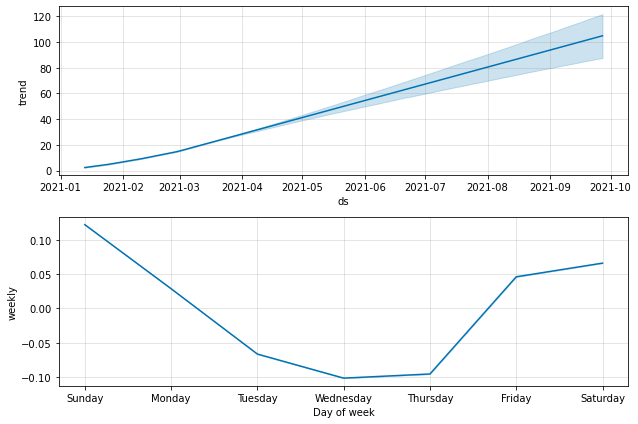

In [70]:
fig2 = m.plot_components(forecast)

In [71]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error


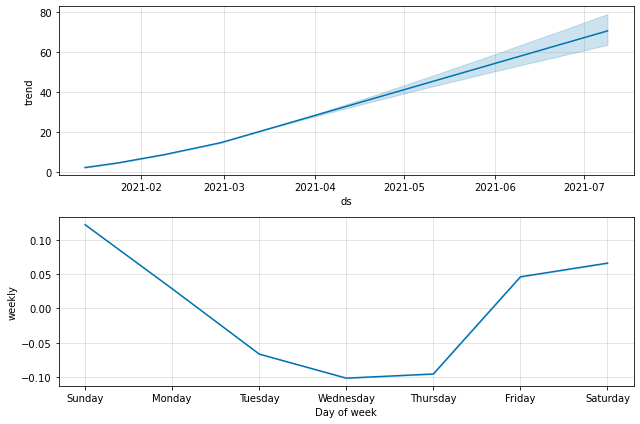